In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:

url = "https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true"
df = pd.read_csv(url)



In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.set_index('Data',inplace=True)

KeyError: "None of ['Data'] are in the columns"

In [8]:
print('The Shape of the dataset is ',df.shape)

The Shape of the dataset is  (8425, 23)


In [11]:
print('Columns of the dataset are',df.columns)

Columns of the dataset are Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [12]:
print('Number of duplicated rows in the dataset are',df.duplicated().sum())

Number of duplicated rows in the dataset are 1663


In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(6762, 23)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm

In [17]:
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [18]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].median())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].median())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].median())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].median())
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].median())
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].median())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].median())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].median())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].median())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].median())
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [19]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
print('Categorical Columns are ',cat_cols)
print('Numerical Columns are ',num_cols)

Categorical Columns are  Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')
Numerical Columns are  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [22]:
df.nunique().to_frame('Unique values')

,Unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


<Axes: xlabel='count', ylabel='Location'>

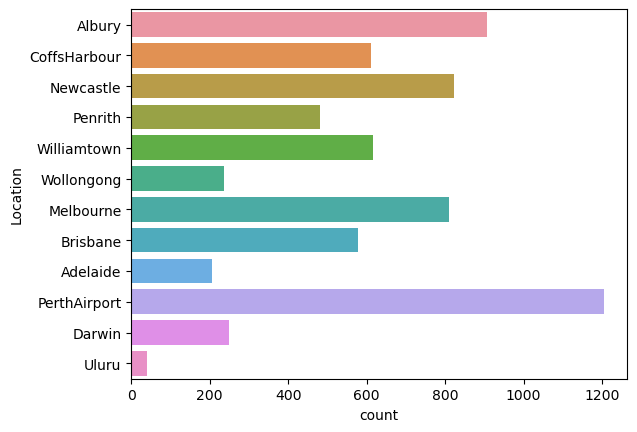

In [25]:
sns.countplot(y=df['Location'])

<Axes: xlabel='count', ylabel='WindGustDir'>

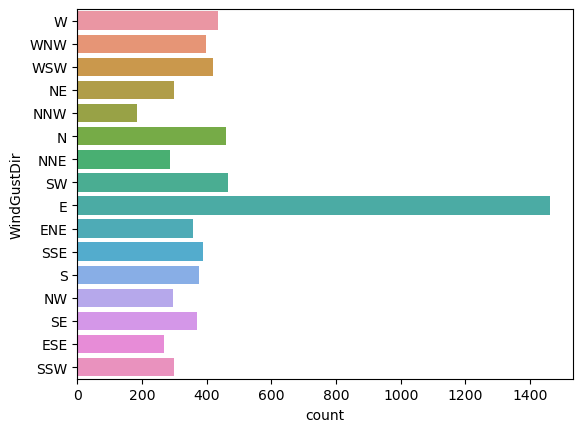

In [26]:
sns.countplot(y=df['WindGustDir'])

<Axes: xlabel='count', ylabel='WindDir9am'>

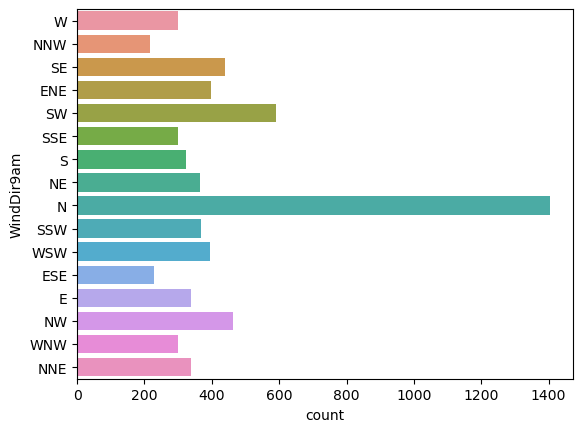

In [27]:
sns.countplot(y=df['WindDir9am'])

<Axes: xlabel='count', ylabel='WindDir3pm'>

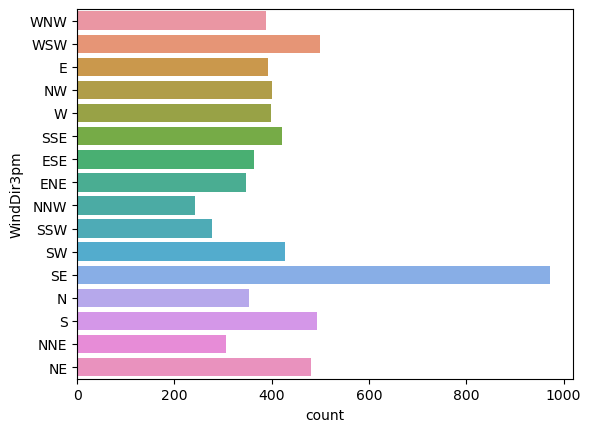

In [28]:
sns.countplot(y=df['WindDir3pm'])

<Axes: xlabel='count', ylabel='RainToday'>

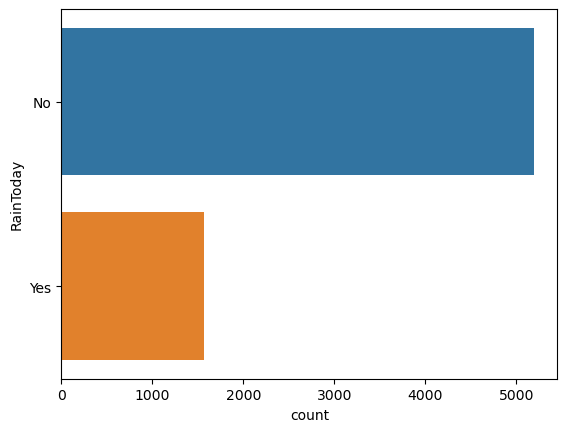

In [29]:
sns.countplot(y=df['RainToday'])

<Axes: xlabel='count', ylabel='RainTomorrow'>

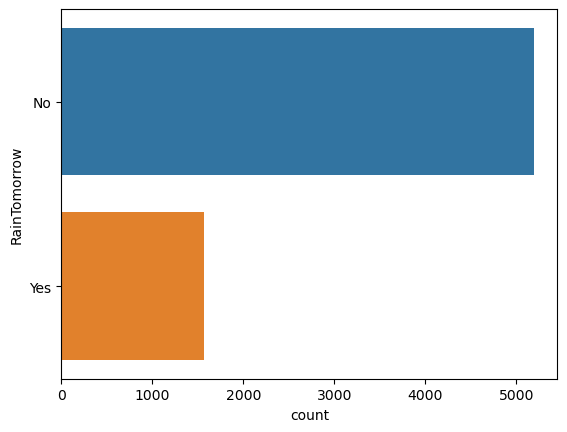

In [30]:
sns.countplot(y=df['RainTomorrow'])

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

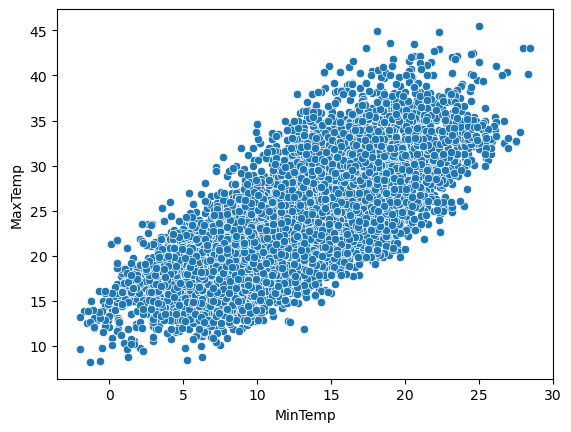

In [35]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df)

<Axes: xlabel='Rainfall', ylabel='Evaporation'>

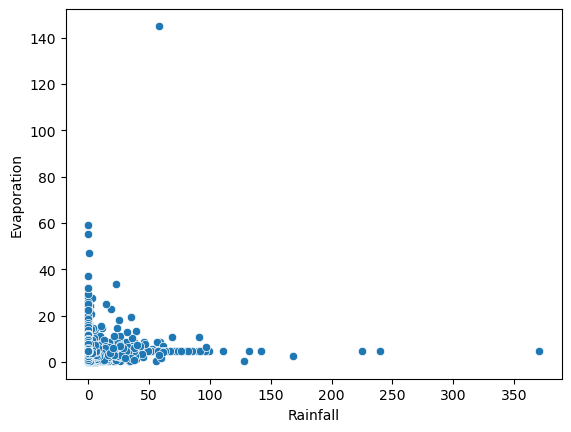

In [36]:
sns.scatterplot(x='Rainfall',y='Evaporation',data=df)

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

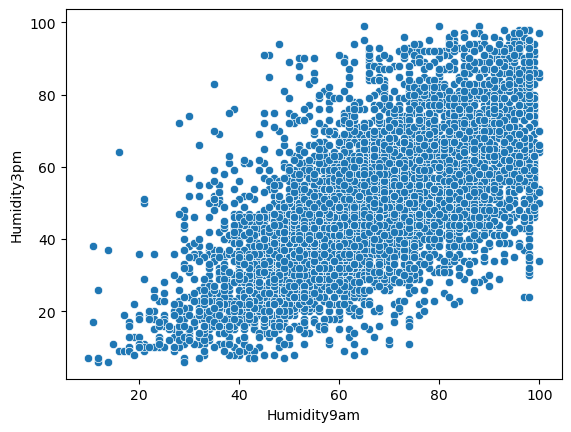

In [37]:
sns.scatterplot(x='Humidity9am',y='Humidity3pm',data=df)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
df    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.4,0.0,4.6,9.0,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,4.6,9.0,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,4.6,9.0,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,4.6,9.0,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

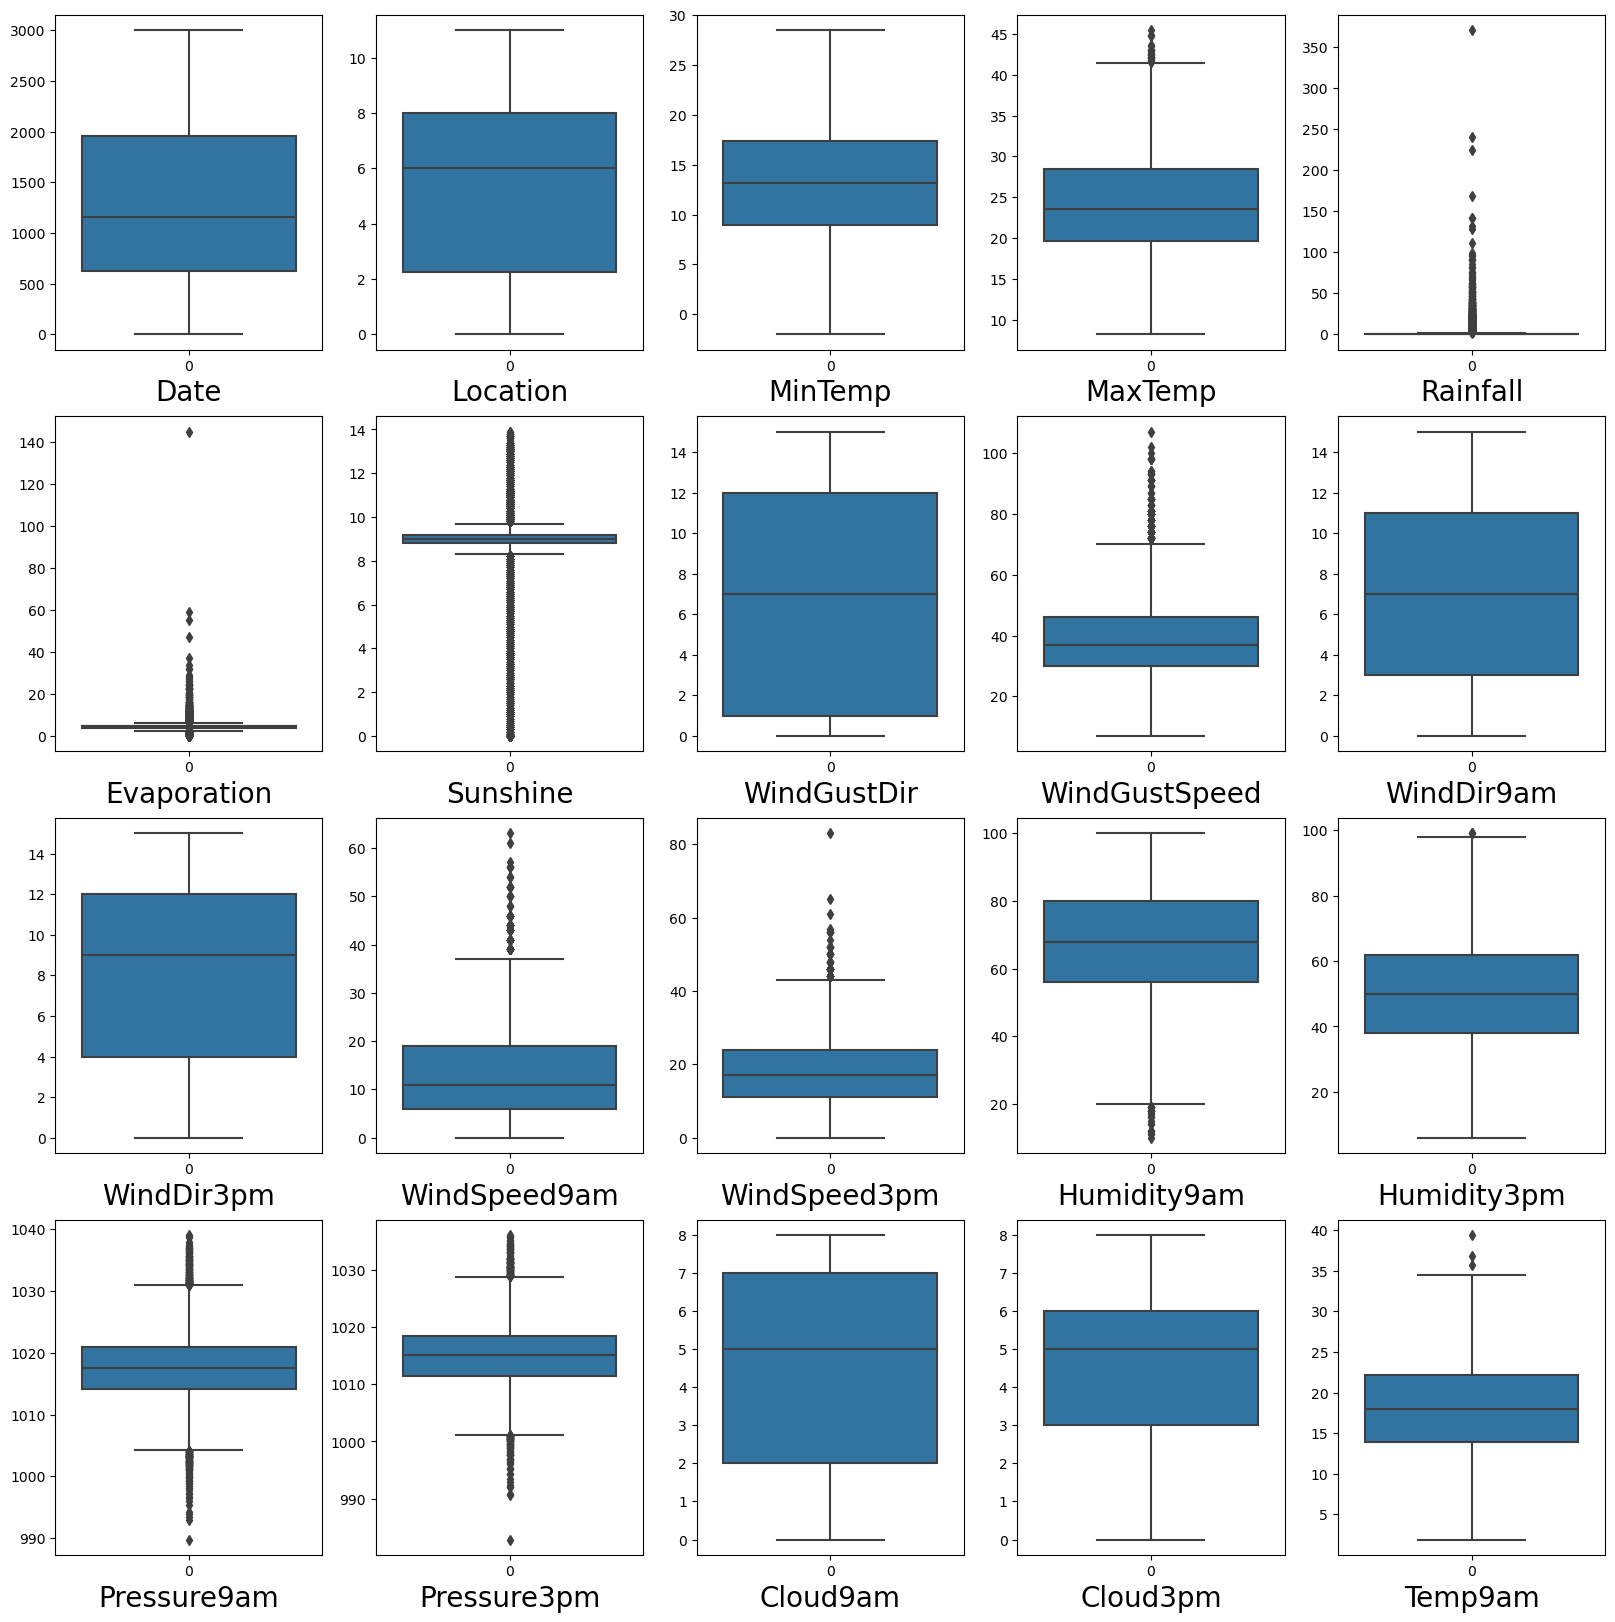

In [40]:
plt.figure(figsize=(20,20))
plot_number=1
for col in df:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plot_number+=1
    
plt.tight_layout

In [41]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df))
z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.609411,1.395097,0.052329,0.194668,0.202435,0.11869,0.207361,1.220923,0.395568,1.315650,...,0.203097,1.538651,1.645999,1.343353,1.396453,0.208282,0.174035,0.150755,0.550355,0.550355
1,1.608153,1.395097,1.030652,0.164227,0.259635,0.11869,0.207361,1.412005,0.395568,0.222688,...,1.368362,1.376463,1.164869,1.226045,0.192678,0.208282,0.121606,0.267878,0.550355,0.550355
2,1.606896,1.395097,0.037920,0.262108,0.259635,0.11869,0.207361,1.603087,0.544900,1.315650,...,1.717576,1.106150,1.662590,1.075221,0.192678,1.072084,0.542498,0.083680,0.550355,0.550355
3,1.605638,1.395097,0.705758,0.637317,0.259635,0.11869,0.207361,0.498814,1.097751,0.436600,...,1.310160,1.863027,0.003521,0.388132,0.192678,0.208282,0.035682,0.636275,0.550355,0.550355
4,1.604381,1.395097,0.792365,1.338795,0.164301,0.11869,0.207361,1.220923,0.171570,1.321500,...,0.843321,0.943962,1.131688,1.527694,0.995194,1.488648,0.016748,1.172125,0.550355,0.550355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.161766,1.186193,1.860937,0.113101,0.259635,0.11869,0.207361,1.263141,0.575089,0.436600,...,0.960947,1.430526,1.157828,0.868739,0.192678,0.208282,1.362432,0.050283,0.550355,0.550355
8421,2.163024,1.186193,1.716540,0.196854,0.259635,0.11869,0.207361,0.116650,1.247082,0.436600,...,0.669936,1.592714,0.975330,0.667639,0.192678,0.208282,1.222621,0.301369,0.550355,0.550355
8422,2.164281,1.186193,1.391646,0.457869,0.259635,0.11869,0.207361,0.689895,0.127093,0.436600,...,0.844543,1.430526,0.560563,0.282199,0.192678,0.208282,0.942998,0.569294,0.550355,0.550355
8423,2.165539,1.186193,0.958453,0.474183,0.259635,0.11869,0.207361,0.456596,0.799087,0.656363,...,0.960947,1.430526,0.295112,0.231924,0.609839,1.072084,0.488611,0.552548,0.550355,0.550355


In [44]:
np.where(z>3)

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
          62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
         381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
         568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
         770,  795,  796,  797,  802,  928,  928,  928,  935,  941,  949,
         978,  979,  979,  980,  980,  980,  980,  981, 1007, 1008, 1008,
        1009, 1010, 1011, 1115, 1138, 1138, 1148, 1148, 1149, 1150, 1151,
        1189, 1202, 1202, 1203, 1237, 1241, 1264, 1264, 1265, 1265, 1356,
        1357, 1386, 1411, 1412, 1413, 1465, 1466, 1479, 1479, 1480, 1480,
        1481, 1486, 1513, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
        1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108,
        2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500,
        2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835, 2837,
        2849, 2849, 2855, 2859, 2863, 

In [45]:
df=df[(z<3).all(axis=1)]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999,9,2.8,23.4,0.0,4.6,9.0,0,31.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
8421,3000,9,3.6,25.3,0.0,4.6,9.0,6,22.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
8422,3001,9,5.4,26.9,0.0,4.6,9.0,3,37.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
8423,3002,9,7.8,27.0,0.0,4.6,9.0,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [46]:
df.skew()

Date             0.305868
Location        -0.005041
MinTemp         -0.073640
MaxTemp          0.263690
Rainfall         3.572436
Evaporation      1.136753
Sunshine        -1.358828
WindGustDir      0.109246
WindGustSpeed    0.544830
WindDir9am       0.214975
WindDir3pm      -0.128511
WindSpeed9am     0.680216
WindSpeed3pm     0.342765
Humidity9am     -0.224837
Humidity3pm      0.139294
Pressure9am      0.067423
Pressure3pm      0.088337
Cloud9am        -0.400423
Cloud3pm        -0.370944
Temp9am         -0.075437
Temp3pm          0.288331
RainToday        1.371384
RainTomorrow     1.383878
dtype: float64

<Axes: >

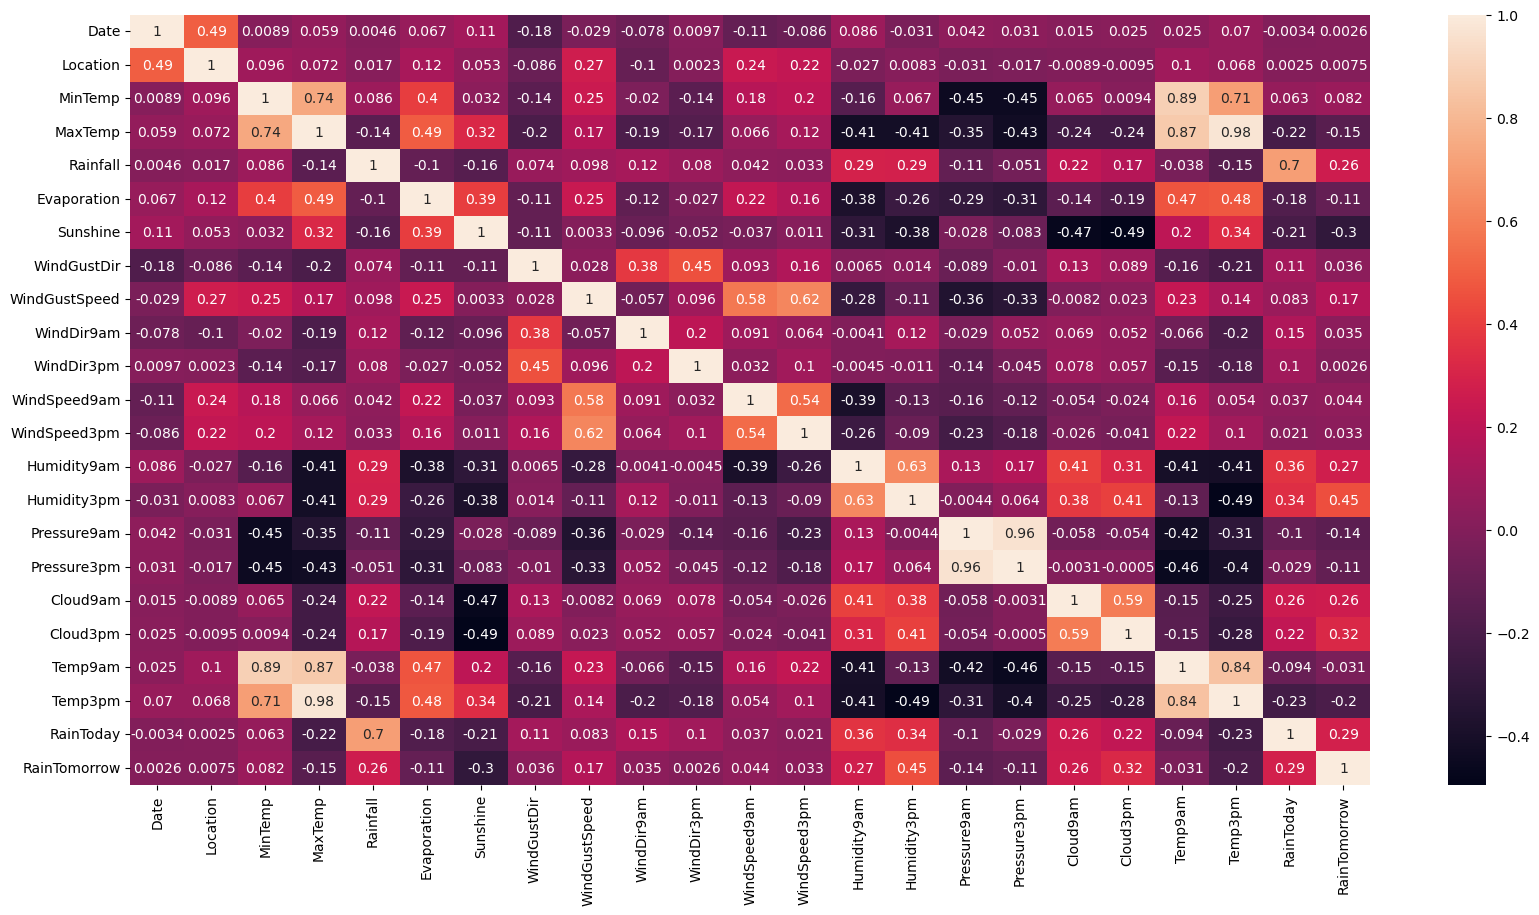

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [48]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,1,13.4,22.9,0.6,4.6,9.0,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1,1,7.4,25.1,0.0,4.6,9.0,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,1,12.9,25.7,0.0,4.6,9.0,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,3,1,9.2,28.0,0.0,4.6,9.0,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,4,1,17.5,32.3,1.0,4.6,9.0,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
